<a href="https://colab.research.google.com/github/01ponyo/ML-Playground/blob/main/CNN_in_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

An implementation of a CNN in TensorFlow for differentiating between imeages with a cross and all other images.

A binary classification problem.

In [1]:
# Importing all necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Setting seed for reproducibility
np.random.seed(24)
tf.random.set_seed(24)

This simple implementation focuses on classifying images that are either a cross or not a cross.

In [3]:
# Initiate a cross image
# A simple 5x5 image of a cross is generated
def generate_x_image():
  return np.array([
      [1, 0, 0, 0, 1],
      [0, 1, 0, 1, 0],
      [0, 0, 1, 0, 0],
      [0, 1, 0, 1, 0],
      [1, 0, 0, 0, 1]
  ])

In [4]:
# Initiate another random 5x5 image
def generate_not_x_image():
  while True:
    image = np.random.randint(2, size=(5, 5)) # low argument default to 0 and therefore is omitted. Upper bound '2' ensures that ony 0 and 1 will be used for image generation
    if not np.array_equal(image, generate_x_image()):
      return image

# Dataset creation:

A total of 1000 images will be randomly generated with a corresponding label 1 and 0 which stand for image being a cross and not.

In [6]:
num_samples = 1000
images = []
labels = []

for _ in range(num_samples):
  if np.random.rand() > 0.5: # dataset is raoghly divided proportionally
    images.append(generate_x_image())
    labels.append(1)
  else:
    images.append(generate_not_x_image())
    labels.append(0)


images = np.array(images).reshape(-1, 5, 5, 1)
labels = np.array(labels)

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=24) # dataset is split in 80% training and 20% test
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=24) # further division of the test set into the test and val

In [8]:
# Dataset: glimpse in
def display_sample_data(images, labels, num_samples=5):
  plt.figure(figsize=(10, 2)) # create a new figure for plotting
  for i in range(num_samples):
    ax = plt.subplot(1, num_samples, i + 1)
    plt.imshow(images[i].reshape(5, 5), cmap='gray_r') # reversed gray scale
    plt.title(f"Label: {labels[i]}")
    plt.axis('off') # no y and x axes
  plt.show()

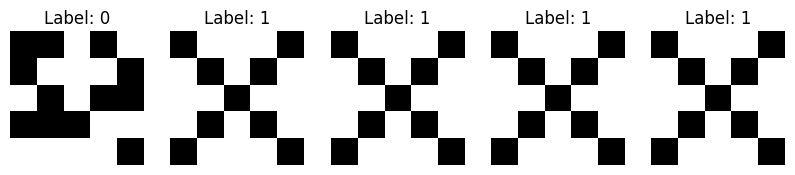

In [14]:
display_sample_data(x_train, y_train)

# Building CNN model:

Architecture:

1st: Convolutional layer: applies four 3x3 filters to an input image to detect and creates four feature maps

2d: Max-Pooling layer: reduces the dimensions of the feature maps, maling the model more efficient

3d: Flatten layer: converts the 2D data into a 1D array, preparing it for the neural network

4th: Hidden layer: fully connected hidden layer with three neurons all with ReLU activation functions

5th: Output layer: a single neuron with a sigmoid activation function

In [20]:
model = Sequential([
    # 1st layer
    Conv2D(filters=4, kernel_size=(3, 3), activation='relu', input_shape=(5, 5, 1)),
    # 2nd layer
    MaxPooling2D(pool_size=(2, 2)),
    # 3d layer
    Flatten(),
    # 4th layer
    Dense(units=3, activation='relu'),
    # 5th layer
    Dense(units=1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model compiling: determines how the model will learn

In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model training

In [22]:
train = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5229 - loss: 0.6585 - val_accuracy: 0.4313 - val_loss: 0.6509
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5209 - loss: 0.6129 - val_accuracy: 0.4313 - val_loss: 0.6147
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5223 - loss: 0.5835 - val_accuracy: 0.9937 - val_loss: 0.5843
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9885 - loss: 0.5526 - val_accuracy: 0.9937 - val_loss: 0.5578
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9885 - loss: 0.5243 - val_accuracy: 0.9937 - val_loss: 0.5334
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9913 - loss: 0.4960 - val_accuracy: 0.9937 - val_loss: 0.5081
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9913 - loss: 0.4669 - val_accuracy: 0.9937 - val_loss: 0.4858
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9913 - loss: 0.4426 - val_accuracy: 0.9937 - val_loss

#Model evaluation

In [23]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.4080  
Test Accuracy: 100.00%


#Training process visualization

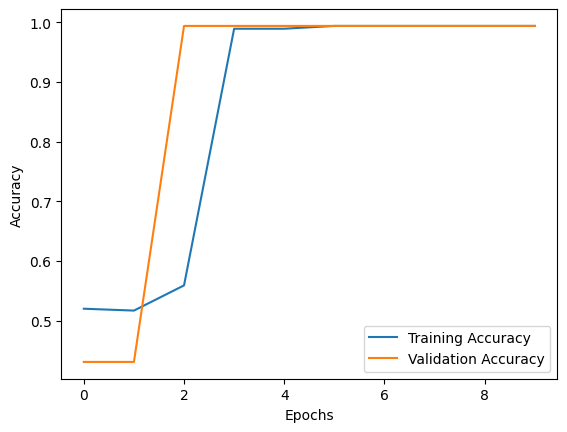

In [24]:
plt.plot(train.history['accuracy'], label='Training Accuracy')
plt.plot(train.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The [following tutorial](https://towardsdatascience.com/implementing-convolutional-neural-networks-in-tensorflow-bc1c4f00bd34/) has been followed to gain a first understanding of the CNN model.